# Data Analytics - Lab 5 - Using link functions to create generalized linear models

<span style="font-size: 20px;">
Konrad Prokop, 408687
</span>

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from cmdstanpy import CmdStanModel
import seaborn as sns
import matplotlib as mpl
import scipy.stats as stats

In [79]:
df = pd.read_csv('Airline_data.csv',index_col=0)
df.describe()

,Fatal accidents,Passenger deaths,Miles flown [100 mln miles]
count,10.000000,10.000000,10.000000
mean,23.800000,691.900000,5715.800000
std,4.709329,252.389228,1117.767795
min,16.000000,223.000000,3863.000000
25%,21.250000,570.500000,5140.500000
50%,23.000000,759.000000,5845.500000
75%,25.750000,812.750000,6175.500000
max,31.000000,1066.000000,7433.000000


In [80]:
df.head()

,Fatal accidents,Passenger deaths,Miles flown [100 mln miles]
Year,,,
1976,24,734,3863.0
1977,25,516,4300.0
1978,31,754,5027.0
1979,31,877,5481.0
1980,22,814,5814.0


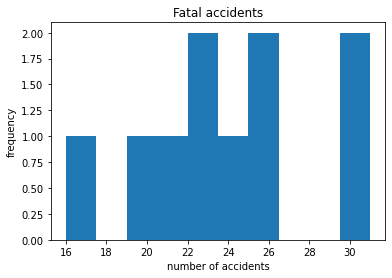

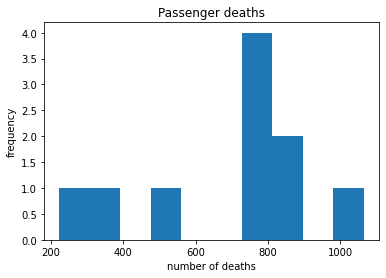

Text(0, 0.5, 'frequency')

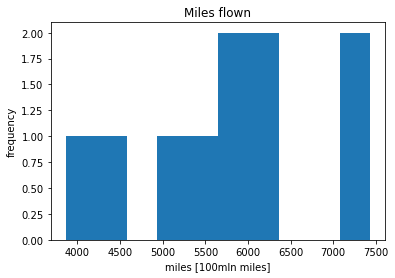

In [81]:
plt.hist(df['Fatal accidents'])
plt.title('Fatal accidents')
plt.xlabel('number of accidents')
plt.ylabel('frequency')
plt.show()
plt.hist(df['Passenger deaths'])
plt.title('Passenger deaths')
plt.xlabel('number of deaths')
plt.ylabel('frequency')
plt.show()
plt.hist(df['Miles flown [100 mln miles]'])
plt.title('Miles flown')
plt.xlabel('miles [100mln miles]')
plt.ylabel('frequency')


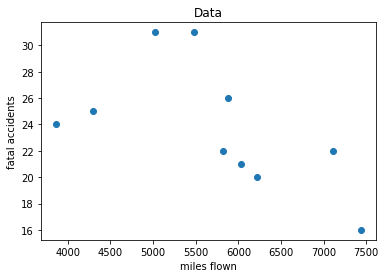

In [82]:
plt.scatter(df["Miles flown [100 mln miles]"], df["Fatal accidents"])
plt.title('Data')
plt.ylabel("fatal accidents")
plt.xlabel("miles flown")
plt.show()

In [83]:
model_ppc = CmdStanModel(stan_file='code_1.stan')

data = {
    'N': df.shape[0],  
    'miles': df['Miles flown [100 mln miles]'].values.tolist(),
    'accidents': df['Fatal accidents'].values.tolist()
}

R = 1000

sim_ppc = model_ppc.sample(
    data=data,
    iter_sampling=R,
    iter_warmup=1,
    chains=1,
    refresh=R,
    fixed_param=True,
    seed=123456,
    output_dir='samples'  
)


INFO:cmdstanpy:compiling stan file /GA/Data-Analytics/lab5/code_1.stan to exe file /GA/Data-Analytics/lab5/code_1


INFO:cmdstanpy:compiled model executable: /GA/Data-Analytics/lab5/code_1
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


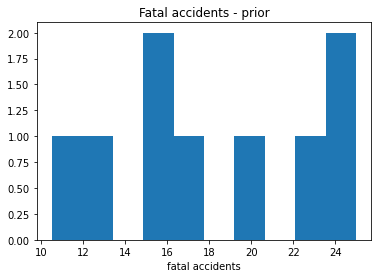

In [84]:
accidents = sim_ppc.stan_variable("accidents")
accidents_mean = [np.mean(accidents[:][n]) for n in range(len(df))]
plt.hist(accidents_mean)
plt.title("Fatal accidents - prior")
plt.xlabel("fatal accidents")
plt.show()

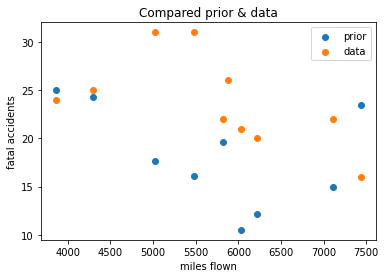

In [85]:
plt.scatter(df["Miles flown [100 mln miles]"],accidents_mean, label="prior")
plt.scatter(df["Miles flown [100 mln miles]"],df["Fatal accidents"], label="data")
plt.title("Compared prior & data")
plt.ylabel("fatal accidents")
plt.xlabel("miles flown")
plt.legend()
plt.show()

In [86]:
df = pd.read_csv('Airline_data.csv', index_col=0)
N = len(df)
print("Wartość N:", N)

Wartość N: 10


In [87]:
model_fit = CmdStanModel(stan_file='code_2.stan')
fit = model_fit.sample(
data=data
) 

INFO:cmdstanpy:compiling stan file /GA/Data-Analytics/lab5/code_2.stan to exe file /GA/Data-Analytics/lab5/code_2
INFO:cmdstanpy:compiled model executable: /GA/Data-Analytics/lab5/code_2
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██████████| 00:00 Sampling completed                     
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                     
chain 4 |██████████| 00:00 Sampling completed                     


INFO:cmdstanpy:CmdStan done processing.


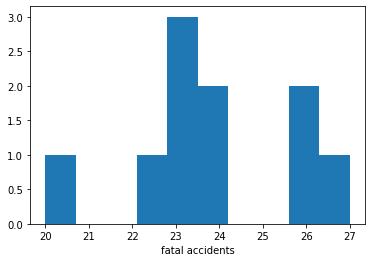

In [88]:
accidents = fit.stan_variable("pred_acc")
accidents_mean = [np.mean(accidents[:][n]) for n in range(len(df))]
plt.hist(accidents_mean)
plt.xlabel("fatal accidents")
plt.show()

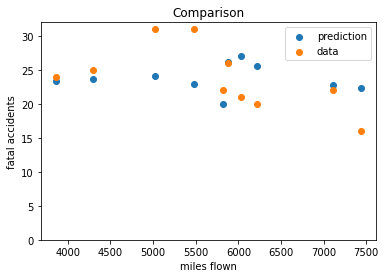

In [89]:
plt.scatter(df["Miles flown [100 mln miles]"], accidents_mean, label="prediction")
plt.scatter(df["Miles flown [100 mln miles]"], df["Fatal accidents"], label="data")
plt.title("Comparison")
plt.ylabel("fatal accidents")
plt.xlabel("miles flown")
plt.legend()
plt.ylim([0, 32])
plt.show()

In [90]:
model_fit = CmdStanModel(stan_file='code_3.stan')
fit = model_fit.sample(data=data)

INFO:cmdstanpy:compiling stan file /GA/Data-Analytics/lab5/code_3.stan to exe file /GA/Data-Analytics/lab5/code_3


INFO:cmdstanpy:compiled model executable: /GA/Data-Analytics/lab5/code_3
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██████▎   | 00:00 Iteration: 1100 / 2000 [ 55%]  (Sampling)

chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


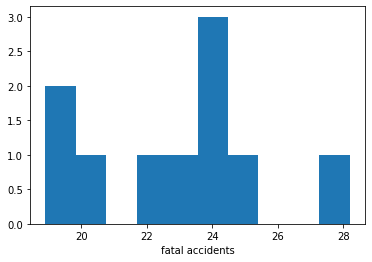

In [91]:
accidents = fit.stan_variable("pred_acc")
accidents_mean = [np.mean(accidents[:][n]) for n in range(len(df))]
plt.hist(accidents_mean)
plt.xlabel("fatal accidents")
plt.show()

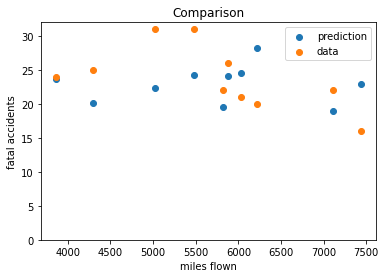

In [92]:
plt.scatter(df["Miles flown [100 mln miles]"], accidents_mean, label="prediction")
plt.scatter(df["Miles flown [100 mln miles]"], df["Fatal accidents"], label="data")
plt.title("Comparison")
plt.ylabel("fatal accidents")
plt.xlabel("miles flown")
plt.legend()
plt.ylim([0, 32])
plt.show()